<a href="https://colab.research.google.com/github/vaitulsidhdhapara/Credit-Card-Default-Prediction/blob/main/Final_Colab_Credit_Card_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


# **Data** **Desciption**

**There are 25 variables:**

• ID: ID of each client

• LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

• Gender: Gender (1=male, 2=female)

 • EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

 • MARRIAGE: Marital status (1=married, 2=single, 3=others)

 • AGE: Age in years

 • PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

 • PAY_2: Repayment status in August, 2005 (scale same as above)

 • PAY_3: Repayment status in July, 2005 (scale same as above)

 • PAY_4: Repayment status in June, 2005 (scale same as above)

 • PAY_5: Repayment status in May, 2005 (scale same as above)

 • PAY_6: Repayment status in April, 2005 (scale same as above)

 • BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

 • BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

 • BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

 • BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

 • BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

 • BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

 • PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

 • PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

 • PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

 • PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

 • PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

 • PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
 
 • default.payment.next.month: Default payment (1=yes, 0=no)

# **Import Packages**

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.simplefilter("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate


from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import metrics  

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

# **Load Data**

In [ ]:
# Mount the drive 

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load and read our data in dataframe

df=pd.read_csv("/content/drive/MyDrive/Capstone-3-Credit Card Default Prediction/Credit Card Default Prediction Data.csv")

In [ ]:
df.head()

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
# For safety perpose we do copy of our dataset

df1=df.copy()

# **Understand the Data**

In [ ]:
# Get the shape of dataset

df.shape

(30000, 25)



*   This dataset contains 30000 rows and 25 columns



In [ ]:
# Get the name of columns

print(df.columns)

Index(['ID', 'LIMIT_BAL', 'GENDER', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')




*   None of the columns contain null values.



# **EDA (EXPLORATORY DATA ANALYSIS)**

## **(1) Check missing values, column type and column names**

In [ ]:
# Information of our data like datatype, null values etc.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   GENDER                      30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A



*   There is no missing value, all columns have the correct data type.



In [ ]:
# Change inconsistent column names "PAY_0" to 'PAY_1', 'default payment next month'to 'DPNM'

df.rename(columns={'PAY_0':'PAY_1','default payment next month':'DPNM'},inplace = True)
df.columns


Index(['ID', 'LIMIT_BAL', 'GENDER', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DPNM'],
      dtype='object')

## **(2) Check duplicate records**

In [ ]:
# Check any duplicate record
len(df[df.duplicated(subset = 'ID')])

0



*   Here no duplicate data in this dataset.



## **(3) Identify outliers**

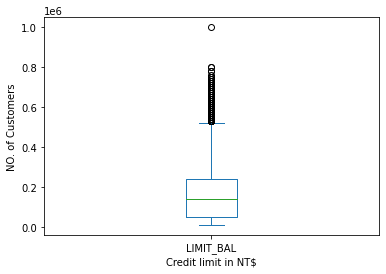

In [ ]:
# Use boxplot to identify any outlier in credit limit

df["LIMIT_BAL"].plot(kind="box")
plt.xlabel('Credit limit in NT$')
plt.ylabel('NO. of Customers')
plt.show()


In [ ]:
# Take a close look at the outlier

df[df['LIMIT_BAL']>900000]

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DPNM
2197,2198,1000000,2,1,1,47,0,0,0,-1,...,891586,927171,961664,50784,50723,896040,50000,50000,50256,0




*   The observations from other columns indicate that this was just a customer who has an excellent payment history.Therefore it should be considered as a valid data.



## **(4) Check numerical columns**

In [ ]:
# Get the statistic summary of the columns

df.describe()

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DPNM
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000




*   Negative value in **"BILL_AMT"** , these are refunds from the last billing cycle.





*  No data is extremly unresonable in these columns



## **(5) Check categorical columns**

We will check these 3 columns: GENDER', 'EDUCATION' and 'MARRIAGE'.  

In [ ]:
# Get Gender column's distribution. 1: male; 2: female

df["GENDER"].value_counts()

2    18112
1    11888
Name: GENDER, dtype: int64



*   The **'GENDER'** column looks fine.



In [ ]:
# EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

df["EDUCATION"].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [ ]:
# Get the total counts of each EDUCATION level

df["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [ ]:
# Change values 4, 5, 6 to 0 and define 0 as 'others'

# 1=graduate school, 2=university, 3=high school, 0=others

df["EDUCATION"] = df["EDUCATION"].replace({4:0,5:0,6:0})
df["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
0      468
Name: EDUCATION, dtype: int64



*   **'EDUCATION'** column: Notice 5 and 6 are both recorded as 'unknown' and there is 0 which isn't explained in the dataset description. Since the amounts are so small, let's combine 0,4,5,6 to 0 which means"other'.



In [ ]:
# From dataset description: MARRIAGE: Marital status (1=married, 2=single, 3=others), but there is also 0

df["MARRIAGE"].unique()

array([1, 2, 3, 0])

In [ ]:
# How many customers had "MARRIAGE" status as 0?

df["MARRIAGE"].value_counts(normalize=True)

2    0.532133
1    0.455300
3    0.010767
0    0.001800
Name: MARRIAGE, dtype: float64

In [ ]:
# Combine 0 and 3 by changing the value 0 into 3

df["MARRIAGE"] = df["MARRIAGE"].replace({0:3})
df["MARRIAGE"].value_counts(normalize=True)

2    0.532133
1    0.455300
3    0.012567
Name: MARRIAGE, dtype: float64



*   **'MARRIAGE'** column: what does 0 mean in 'MARRIAGE'? Since there are only 0.18%  observations of 0, we will combine 0 and 3 in one value as 'others'.




## **(4) Trends and Findings**

In [ ]:
# Set ID as dataframe index

df.set_index('ID', inplace = True)
df.head()

,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DPNM
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


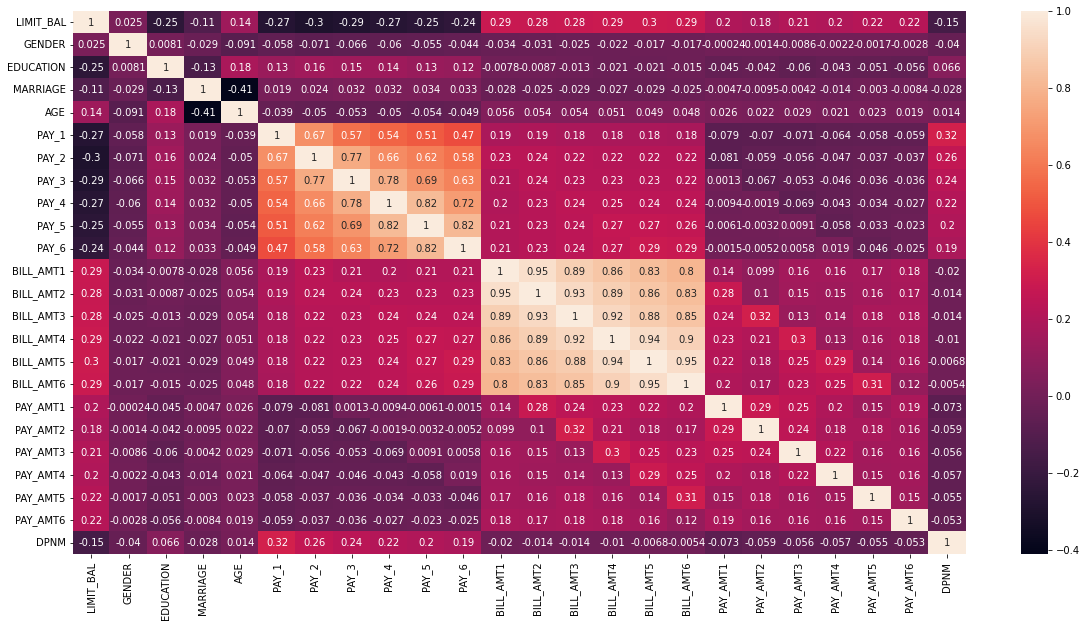

In [ ]:
# plotting the correlation plot for relation of independent variables.

plt.rcParams["figure.figsize"]=(20,10)
sns.heatmap(df.corr(),annot=True)

plt.show()



*   Here Some fetures is correlated to each other but we don't remove it because here bill amount is depend of last or next month bill amount.



In [ ]:
df.DPNM.value_counts()

0    23364
1     6636
Name: DPNM, dtype: int64

##1) How much Credit Card defaults ?

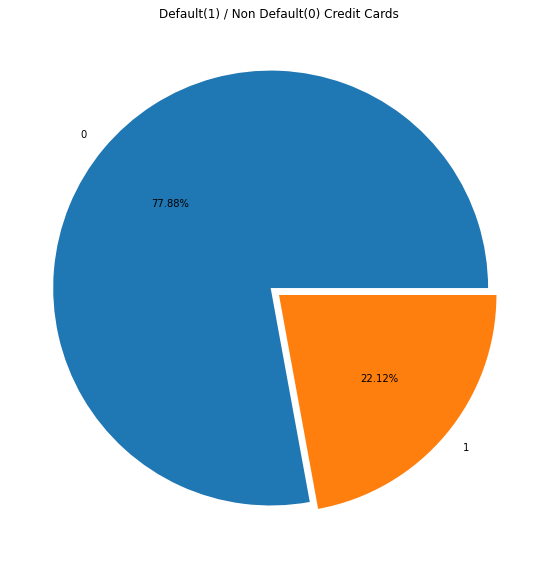

In [ ]:
# Percentage of Default/ Non Default Data

cd=pd.DataFrame(df["DPNM"].value_counts())
plt.pie(cd["DPNM"],labels=cd.index,autopct="%1.2f%%",radius=1,explode=[0.05,0]) 
plt.title("Default(1) / Non Default(0) Credit Cards")
plt.show()



*  77.88% is non default while 22.12% are default . It is a big number.

## 2) Gender wise Credit Card Holders

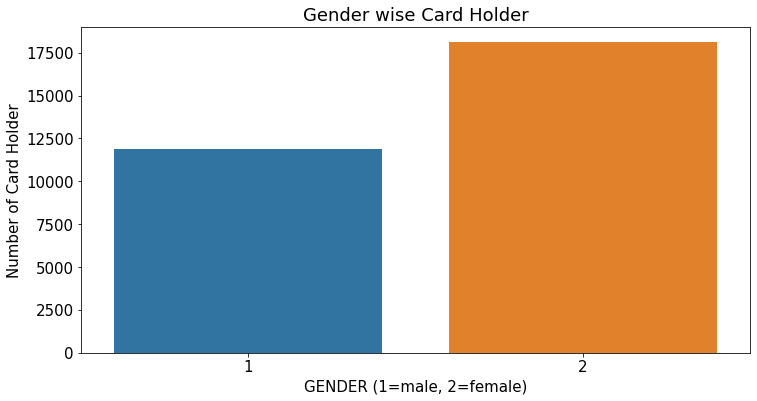

In [ ]:
plt.rcParams["figure.figsize"]=(12,6)
plt.rcParams.update({"font.size": 15})
sns.countplot(df["GENDER"])
plt.ylabel("Number of Card Holder")
plt.xlabel("GENDER (1=male, 2=female)")
plt.title("Gender wise Card Holder")
plt.show()



*  Females have more number of card compare to Males.



##3)  Education wise Credit Card Holders

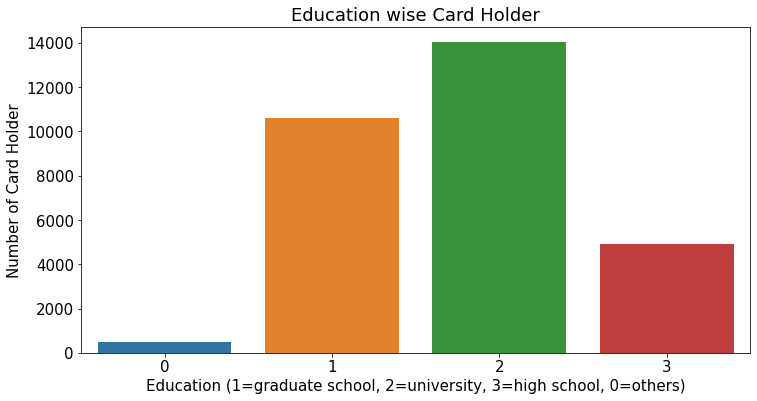

In [ ]:
plt.rcParams["figure.figsize"]=(12,6)
plt.rcParams.update({"font.size": 15})
sns.countplot(df["EDUCATION"])
plt.ylabel("Number of Card Holder")
plt.xlabel("Education (1=graduate school, 2=university, 3=high school, 0=others)")
plt.title("Education wise Card Holder")
plt.show()



*   More number of Credit Card holders are University students followed by Graduates and then High school students.



## 4) Marital Status wise Credit Card Holders

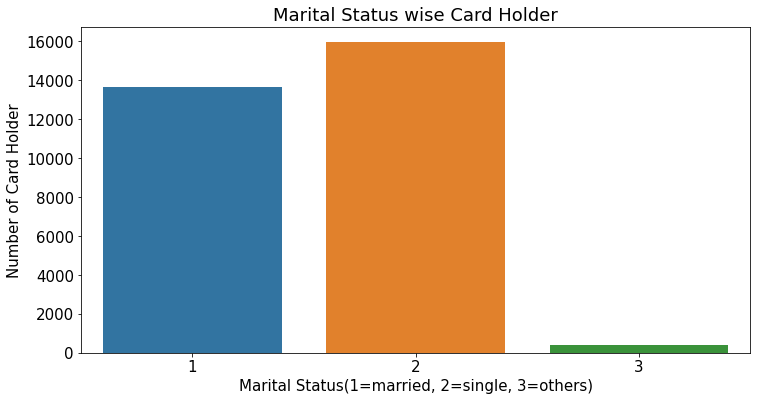

In [ ]:
plt.rcParams["figure.figsize"]=(12,6)
plt.rcParams.update({"font.size": 15})
sns.countplot(df["MARRIAGE"])
plt.ylabel("Number of Card Holder")
plt.xlabel("Marital Status(1=married, 2=single, 3=others)")
plt.title("Marital Status wise Card Holder")
plt.show()



*   More number of Credit Cards holders are Married.


## (5) On average, which gender group tends to have more default payments? 

In [ ]:
# Define a function to plot stacked bar chart since there will be multiple stacked bars charts to plot

def create_stacked_bar(column_name):

    # Get the percentage of default by each group
    default_by_group = pd.crosstab(index=df['DPNM'],columns = df[column_name], normalize = 'columns')
    
    # Round up to 2 decimal
    default_by_group = default_by_group.apply(lambda x: round(x,2))
    
    labels = default_by_group.columns
    list1 = default_by_group.iloc[0].to_list()
    list2 = default_by_group.iloc[1].to_list()
    
    list1_name = "No default"
    list2_name = "Has default"
    title = f"Default by {column_name}"
    xlabel = column_name
    ylabel = "Default percentage"
    
    fig, ax = plt.subplots(figsize=(10, 5))
    bar_width = 0.5
    
    ax1 = ax.bar(labels,list1, bar_width, label = list1_name)
    ax2 = ax.bar(labels,list2, bar_width, bottom = list1, label = list2_name)

    ax.set_title(title, fontweight = "bold")
    ax.set_xlabel(xlabel, fontweight = "bold")
    ax.set_ylabel(ylabel, fontweight = "bold")
    ax.legend(loc="best")
    
    plt.xticks(list(range(len(labels))), labels,rotation=90)
    plt.yticks(fontsize=9)

    for r1, r2 in zip(ax1, ax2):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., f"{h1:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")
        plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., f"{h2:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")

    plt.show()


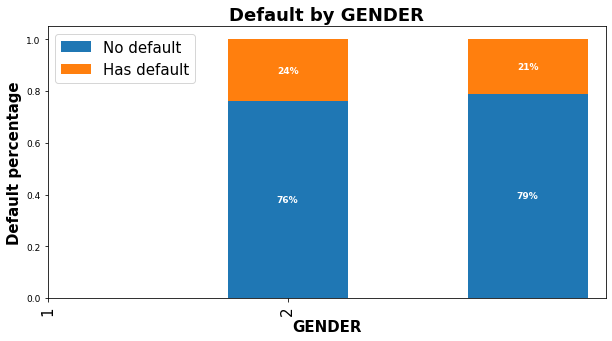

In [ ]:
# Plot a stacked bar chart to visualize default percentage by female and male

create_stacked_bar('GENDER')

# 2-Female
# 1-Male



*   24% male have default payment while 21% female have default payment, the difference is not significant. (2-Female, 1-Male)



## (6) Did customers with higher education have less default payment?

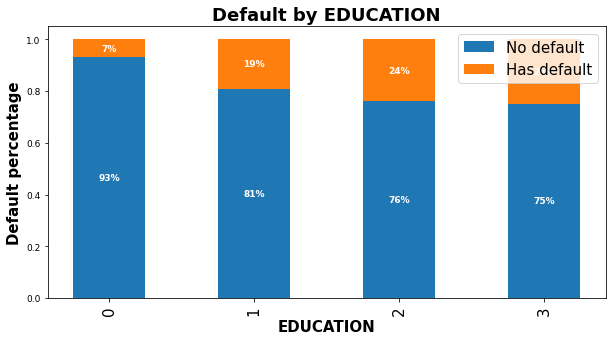

In [ ]:
# Plot a stacked bar chart to show default by education level

create_stacked_bar('EDUCATION')

# Education (1=graduate school, 2=university, 3=high school, 0=others)



*   The data indicates customers with lower education levels default more. Customers with high school and university educational level had higher default percentages than customers with graduate school education. (1=graduate school, 2=university, 3=high school, 0=others)




## (7) Does marital status have anything to do with default risk? Note the credit limit includes the family's total credit.

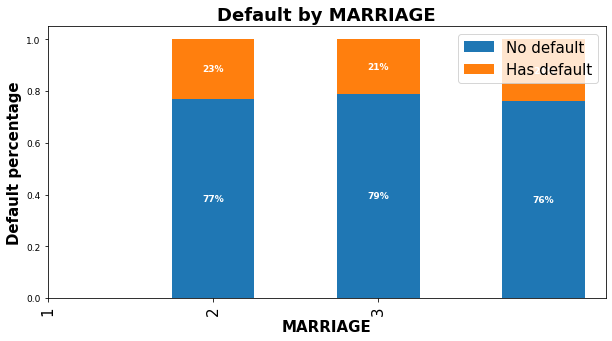

In [ ]:
# Plot a stacked bar chart to visualize default and non-default distribution by marital status 

create_stacked_bar('MARRIAGE')

# 1=married, 2=single, 3=others


*   There is no difference of default risk in terms of marital status, although the 'other' marital status group has high default percentage.(1=married, 2=single, 3=others)

## (8) Do younger people tend to miss the payment deadline?

In [ ]:
# Segment the 'AGE' column to 6 groups

bins= [21,30,40,50,60,70,80]
labels = ['20-30','30-40','40-50','50-60','60-70','70-80']
df['AGE'] = pd.cut(df['AGE'],bins=bins, labels=labels,right=False)




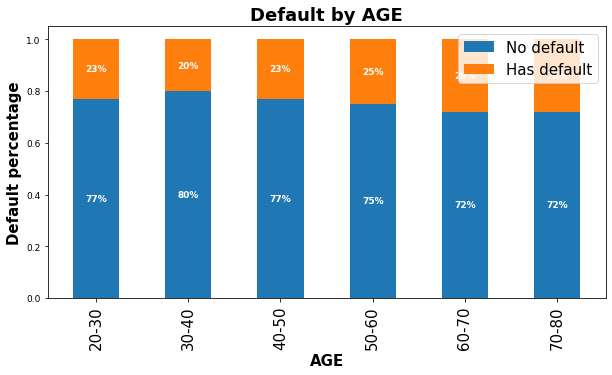

In [ ]:
# Plot a stacked bar chart to visualize default and non-default by age

create_stacked_bar('AGE')



*  Customers aged between 30-40 had the lowest default payment rate, while younger groups (20-30) and older groups (50-70) all had higher delayed payment rates. 





## (9) Did customers with a high education level get higher credit limits?

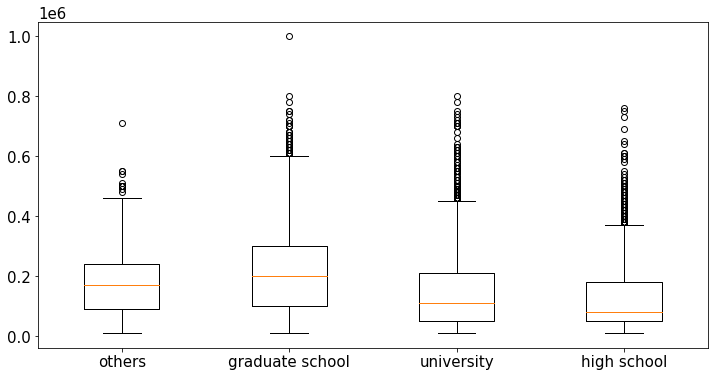

In [ ]:
# Use boxplot to visualize credit limit grouped by education level

data = []
for i in [0,1,2,3]:
    temp = df.loc[df["EDUCATION"] == i, "LIMIT_BAL"]
    data.append(temp)

fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xticklabels(["others","graduate school", "university", "high school"])

plt.show()



*   From the boxplot, we can see that customers with graduate school education have the highest 25% percentile,highest median,highest 75th percentile and highest maximum numbers, which proves that customers with higher education levels did get higher credit limits.



## (10) Has the repayment status changed in the 6 month from April 2005 (PAY_6)  to September 2005(PAY_0)?

In [ ]:
# Create a new column "HAS_DEF" to indicate customers who have at least 1 deafult payment from PAY_1 to Pay_6
# 0 : no default ; 1: has default

def_condition = (df.PAY_1 >1) | (df.PAY_2 >1) | (df.PAY_3 >1) | (df.PAY_4 >1) | (df.PAY_5 >1) | (df.PAY_6 >1)
df.loc[def_condition, "HAS_DEF"] = 1
df.loc[df.HAS_DEF.isna(), "HAS_DEF"] = 0

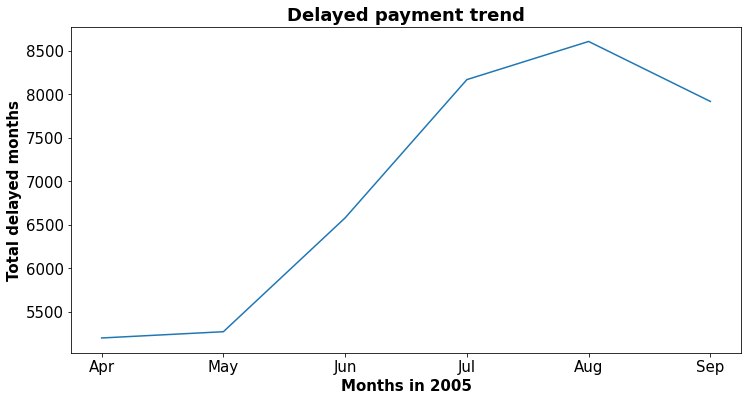

In [ ]:
# Subset a dataframe with the records that have default

has_default = df[df["HAS_DEF"]== 1]
default_trend = has_default[['PAY_6','PAY_5','PAY_4','PAY_3','PAY_2','PAY_1']].sum(axis=0)

# Draw a line chart to show the trend. The lower the number, the shorter delayed payment
fig,ax = plt.subplots()
ax.plot(default_trend)
plt.xticks(['PAY_6','PAY_5','PAY_4','PAY_3','PAY_2','PAY_1'],['Apr','May','Jun','Jul','Aug','Sep'])

plt.xlabel('Months in 2005',fontweight='bold')
plt.ylabel('Total delayed months',fontweight='bold')
plt.title('Delayed payment trend',fontweight='bold')

plt.show()



*   There was a huge jump from May,2005 (PAY_5) to July, 2005 (PAY_3) when delayed payment increased significantly, then it peaked at August, 2005 (PAY_2), things started to get better in September, 2005 (PAY_1).


## (11) Is there any correlation between credit limit and the default payment next month?

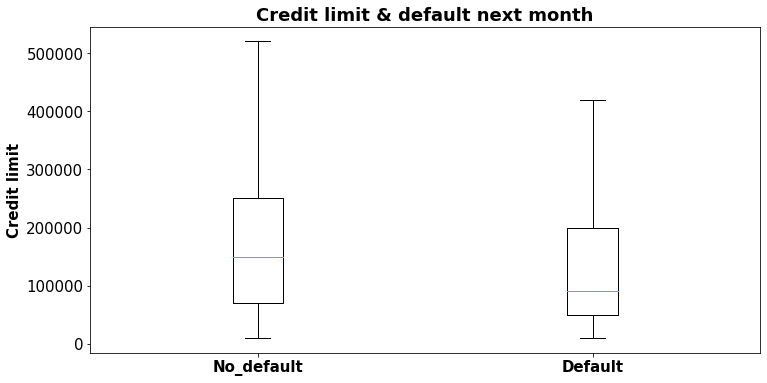

In [ ]:
# Make a boxplot to visualize credit limit and default payment next month
# 1: default next month; 0: no default next month

def0 = df.loc[df['DPNM'] == 0,'LIMIT_BAL']
def1 = df.loc[df['DPNM'] == 1,'LIMIT_BAL']

fig, ax = plt.subplots()
ax.boxplot([def0, def1],  showfliers=False)

ax.set_xticklabels(['No_default',"Default"],fontweight ='bold')
ax.set_ylabel('Credit limit',fontweight ='bold')
ax.set_title('Credit limit & default next month',fontweight ='bold')

plt.show()




*   Unsurprisingly, customers who had higher credit limits had lower delayed (default) payment rates.



## (12) Checking the Data Distribution of Balance Limit

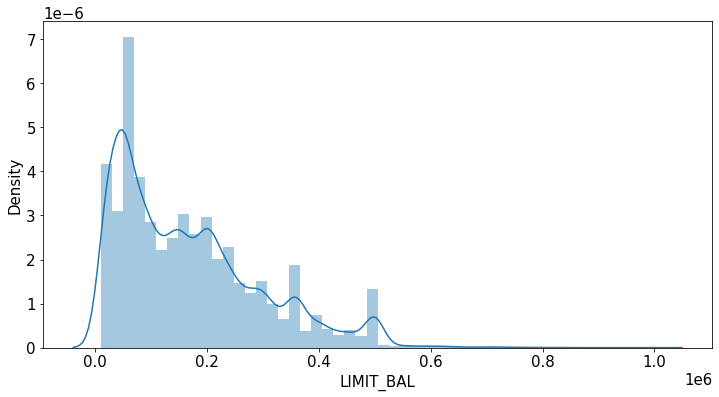

In [ ]:
sns.distplot(df["LIMIT_BAL"])
plt.show()

Here **"LIMIT_BAL"** has positively skewed distribution

# **PREPARING THE DATA FOR MODELING**

In [ ]:
df.head()

,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DPNM,HAS_DEF
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,20-30,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,1,1.0
2,120000,2,2,2,20-30,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,1.0
3,90000,2,2,2,30-40,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,0.0
4,50000,2,2,1,30-40,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,0.0
5,50000,1,2,1,50-60,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,0.0


In [ ]:
# remove the "HAS_DEF" column because it is made by us for showing delayed payment

df.drop(columns=["HAS_DEF"],inplace=True)

## (1) Feature Engineering

In [ ]:
# Covert categorical column into integer by extracting the code of the categories

df["AGE"] = df["AGE"].cat.codes
df.head()

,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DPNM
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,0,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,0,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,1,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,1,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,3,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.columns

Index(['LIMIT_BAL', 'GENDER', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DPNM'],
      dtype='object')

In [ ]:
# Here we saperate the categorical and numerical column and create its dataframe

# catrgotical features dataframe
cat_column_df=df[["GENDER","EDUCATION","MARRIAGE","AGE","PAY_1","PAY_2","PAY_3","PAY_4","PAY_4","PAY_5","PAY_6"]]   

# numerical features dataframe
num_column_df=df[['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]  


In [ ]:
# here we do one-hot encoding and get dummies variables for categorical features.

categorical_vars=["GENDER","EDUCATION","MARRIAGE","AGE","PAY_1","PAY_2","PAY_3","PAY_4","PAY_4","PAY_5","PAY_6"]
dataset = pd.get_dummies(cat_column_df,columns=categorical_vars).reset_index().drop(["ID"], axis=1)
dataset.head()

,GENDER_1,GENDER_2,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,AGE_0,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,0,1,0,0,1,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0




*   Here we get all dummie variables for categorical freatures.



## (2) Rescale Features



*   Here we get rescale features from the numerical data.
*   Rescaling is an important because if data has no perfect distribution, rescaling will do it better.



In [ ]:
# rescale all the numerical features for better performance of model.

a=StandardScaler()
num_column_df=a.fit_transform(num_column_df)  #Apply standard scaler on Numerical column.
new_num_column_df=pd.DataFrame(num_column_df)
new_num_column_df                                # Save this value (Standard scaler) in this data frame

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.136720,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,-0.365981,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,-0.597202,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,-0.905498,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,-0.905498,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,1.870379,2.018136,2.326690,0.695474,-0.149259,-0.384392,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130
29996,-0.134759,-0.672786,-0.665299,-0.627430,-0.532924,-0.577691,-0.652724,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382
29997,-1.059646,-0.647227,-0.643830,-0.638158,-0.347961,-0.324517,-0.327687,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001
29998,-0.674276,-0.717982,0.410269,0.422373,0.147844,-0.468063,0.169130,4.844316,-0.109033,-0.229895,-0.185120,3.152536,-0.191904


In [ ]:
X=pd.concat([dataset,new_num_column_df],axis=1)    #For final x values(features) we concate numerical and categorical features in to one dataframe.

# rename (give original name to) all numerical values which is change after rescaling.
X.rename(columns={0:'LIMIT_BAL', 1:'BILL_AMT1', 2:'BILL_AMT2', 3:'BILL_AMT3', 4:'BILL_AMT4', 5:'BILL_AMT5', 6:'BILL_AMT6', 7:'PAY_AMT1', 8:'PAY_AMT2', 9:'PAY_AMT3', 10:'PAY_AMT4', 11:'PAY_AMT5', 12:'PAY_AMT6'},inplace=True)

## (3) Feature Selection



*   We drop the columns like "ID" and "DPNM" for getting features.
*   Here we get Target variable and all the features for modeling.



In [ ]:
# Features for model

X.head()

,GENDER_1,GENDER_2,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,AGE_0,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0,1,0,0,1,0,1,0,0,1,...,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,0,1,0,0,1,0,0,1,0,1,...,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,0,1,0,0,1,0,0,1,0,0,...,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,0,1,0,0,1,0,1,0,0,0,...,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,1,0,0,0,1,0,1,0,0,0,...,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187


In [ ]:
# Target Variable 

y = df['DPNM']
y


ID
1        1
2        1
3        0
4        0
5        0
        ..
29996    0
29997    0
29998    1
29999    1
30000    1
Name: DPNM, Length: 30000, dtype: int64

## (4) Check Class Imbalance



0    0.7788
1    0.2212
Name: DPNM, dtype: float64


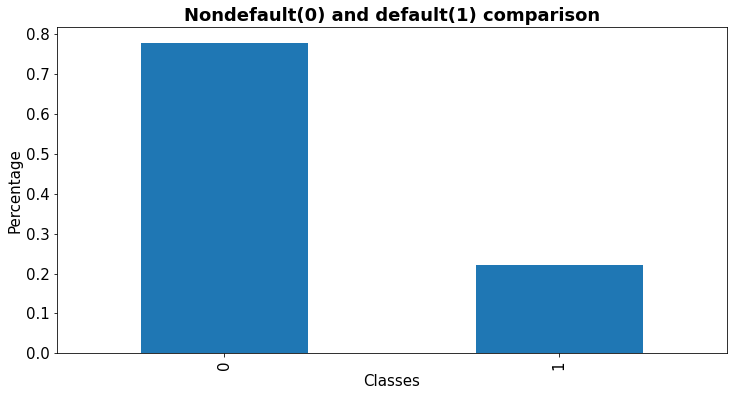

In [ ]:
# Check target classes balancec
cla_bal = df['DPNM'].value_counts(normalize=True)
print(cla_bal)

# Plot the classes
cla_bal.plot(kind = 'bar')
plt.title('Nondefault(0) and default(1) comparison',fontweight = "bold")
plt.xlabel('Classes')
plt.ylabel('Percentage')
plt.show()



*   With typical default classification problems, we expect imbalanced classes as we know most people will not default. This dataset is also imbalanced, with 78% non-default vs. 22% default.



## (5) Split Train and Test Data ( With Managing Imbalance )



*   Here we found that data has imbalance so we have to mange it. We will use Class Balancing Technique.
*   Here we use SMOTE (Synthetic Minority Oversampling Technique ) for balncing the class.



In [ ]:
# First we split data  in to train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

X_train.shape

(21000, 125)

In [ ]:
# Here Datasetset is imbalanced so we use SMOTE to train our Model

sm = SMOTE(random_state = 42)
X_train, y_train = sm.fit_resample(X_train.to_numpy(), y_train.to_numpy())  # Here we convert data into array and then apply SMOTE

In [ ]:
X_train.shape # Here we can see that it creates many synthetic data point

(32648, 125)

# **Classification Predictive Modeling**

# (1) Logistic Regression

In [ ]:
# Instantiate model

lr= LogisticRegression()
lr.fit(X_train,y_train)  #fit the data into model

y_train_pred=lr.predict(X_train)   # predict output from train data
y_test_pred=lr.predict(X_test)     # predict output from test data

print(accuracy_score(y_train_pred,y_train))  # accuracy score for training data
print(accuracy_score(y_test_pred,y_test))   # accuracy score for testing data

0.7065057583925508
0.7661111111111111




*   Here accuracy score for testing is 76% and for trainning is 70%.



Now we will get precision, recall and f1-score  for both trainning and testing data.

In [ ]:

print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.67      0.83      0.74     16324
           1       0.77      0.59      0.67     16324

    accuracy                           0.71     32648
   macro avg       0.72      0.71      0.70     32648
weighted avg       0.72      0.71      0.70     32648

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      7040
           1       0.47      0.58      0.52      1960

    accuracy                           0.77      9000
   macro avg       0.67      0.70      0.68      9000
weighted avg       0.79      0.77      0.77      9000



Cross Validation Score

In [ ]:
# Use model's default parameters to get cross validation score

lr_cv = cross_val_score(lr, X_test, y_test, scoring ="roc_auc", cv = 5)
np.mean(lr_cv)   # average roc-auc score from cv=5

0.7585053339517626

# (2) Decision Tree Classifier

In [ ]:
# Instantiate model

dtc=DecisionTreeClassifier(criterion="gini",random_state=100,min_samples_leaf=10,max_depth=10)
dtc.fit(X_train,y_train)

y_train_pred=dtc.predict(X_train)  # predict output from train data
y_test_pred=dtc.predict(X_test)    # predict output from test data

print(accuracy_score(y_train_pred,y_train))  # accuracy score for training data
print(accuracy_score(y_test_pred,y_test))   # accuracy score for testing data

0.7718083802989464
0.751




*   Here accuracy score for testing is 75% and for trainning is 77%.



Now we will get precision, recall and f1-score for both trainning and testing data.

In [ ]:
print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.74      0.83      0.78     16324
           1       0.81      0.71      0.76     16324

    accuracy                           0.77     32648
   macro avg       0.78      0.77      0.77     32648
weighted avg       0.78      0.77      0.77     32648

              precision    recall  f1-score   support

           0       0.86      0.81      0.84      7040
           1       0.44      0.54      0.49      1960

    accuracy                           0.75      9000
   macro avg       0.65      0.67      0.66      9000
weighted avg       0.77      0.75      0.76      9000



Cross Validation Score

In [ ]:
# Use model's default parameters to get cross validation score

dtc_cv = cross_val_score(dtc, X_test, y_test, scoring ="roc_auc", cv = 5)
np.mean(dtc_cv)

0.6976317906423933

# (3) Random Forest Classifier

In [ ]:
# First we determine the parameter

param_grid = {'max_depth': [60, 90, 110],'min_samples_leaf': [3, 4, 5],'min_samples_split': [8, 10, 12],'n_estimators': [100, 200, 300]}

In [ ]:
# Here we will get best parameter for our dataset and fit into model.

rf=RandomForestClassifier()

# Instantiate grid search model
rfc = GridSearchCV(estimator = rf, param_grid = param_grid ,cv=3,scoring="roc_auc")
rfc.fit(X_train,y_train)
rfc.best_params_

{'max_depth': 110,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [ ]:
y_train_pred=rfc.predict(X_train)   # predict output from train data
y_test_pred=rfc.predict(X_test)     # predict output from test data

print(accuracy_score(y_train_pred,y_train))  # accuracy score for training data
print(accuracy_score(y_test_pred,y_test))   # accuracy score for testing data

0.9406701788777261
0.791




*  Here accuracy score for testing is 79% and for trainning is 94%.



Now we will get precision, recall and f1-score for both trainning and testing data.

In [ ]:

print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     16324
           1       0.94      0.94      0.94     16324

    accuracy                           0.94     32648
   macro avg       0.94      0.94      0.94     32648
weighted avg       0.94      0.94      0.94     32648

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      7040
           1       0.52      0.50      0.51      1960

    accuracy                           0.79      9000
   macro avg       0.69      0.68      0.69      9000
weighted avg       0.79      0.79      0.79      9000



# (4) Gradient Boosting Classifier

In [ ]:
# Instantiate model

gbc=GradientBoostingClassifier(learning_rate=0.01)
gbc.fit(X_train,y_train)

y_train_pred=gbc.predict(X_train)  # predict output from train data
y_test_pred=gbc.predict(X_test)    # predict output from test data


print(accuracy_score(y_train_pred,y_train))  # accuracy score for training data
print(accuracy_score(y_test_pred,y_test))   # accuracy score for testing data

0.7133974516049988
0.7921111111111111




*   Here accuracy score for testing is 79% and for trainning is 71%.



Now we will get precision, recall and f1-score for both trainning and testing data.

In [ ]:

print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.66      0.89      0.76     16324
           1       0.83      0.54      0.65     16324

    accuracy                           0.71     32648
   macro avg       0.74      0.71      0.70     32648
weighted avg       0.74      0.71      0.70     32648

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      7040
           1       0.52      0.48      0.50      1960

    accuracy                           0.79      9000
   macro avg       0.69      0.68      0.68      9000
weighted avg       0.79      0.79      0.79      9000



Cross Validation Score

In [ ]:
# Use model's default parameters to get cross validation score

dtc_cv = cross_val_score(gbc, X_test, y_test, scoring ="roc_auc", cv = 5)
np.mean(dtc_cv)

0.7554488201530611

# (5) XGB Classifier

In [ ]:
# Instantiate model

xgb=XGBClassifier()
xgb.fit(X_train,y_train)

y_train_pred=xgb.predict(X_train)    # predict output from train data
y_test_pred=xgb.predict(X_test.to_numpy())     # predict output from test data


print(accuracy_score(y_train_pred,y_train))  # accuracy score for training data
print(accuracy_score(y_test_pred,y_test))   # accuracy score for testing data

0.8133116883116883
0.7902222222222223




*   
Here accuracy score for testing is 79% and for trainning is 81%.



Now we will get precision, recall and f1-score for both trainning and testing data.

In [ ]:
print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.83     16324
           1       0.87      0.74      0.80     16324

    accuracy                           0.81     32648
   macro avg       0.82      0.81      0.81     32648
weighted avg       0.82      0.81      0.81     32648

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      7040
           1       0.52      0.50      0.51      1960

    accuracy                           0.79      9000
   macro avg       0.69      0.68      0.69      9000
weighted avg       0.79      0.79      0.79      9000



Cross Validation Score

In [ ]:
# Use model's default parameters to get cross validation score

dtc_cv = cross_val_score(xgb, X_test.to_numpy(), y_test, scoring ="roc_auc", cv = 5)
np.mean(dtc_cv)

0.7734411236085342

# (6) K Neighbors Classifier

In [ ]:
# Instantiate model

knnc=KNeighborsClassifier(n_neighbors=3)

knnc.fit(X_train,y_train)

y_train_pred=knnc.predict(X_train)   # predict output from train data
y_test_pred=knnc.predict(X_test)     # predict output from test data

print(accuracy_score(y_train_pred,y_train))  # accuracy score for training data
print(accuracy_score(y_test_pred,y_test))   # accuracy score for testing data

0.9044964469492771
0.6713333333333333




   

*   Here accuracy score for testing is 67% and for trainning is 90%.





Now we will get precision, recall and f1-score for both trainning and testing data.

In [ ]:
print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.83      0.90     16324
           1       0.85      0.98      0.91     16324

    accuracy                           0.90     32648
   macro avg       0.91      0.90      0.90     32648
weighted avg       0.91      0.90      0.90     32648

              precision    recall  f1-score   support

           0       0.85      0.70      0.77      7040
           1       0.34      0.56      0.42      1960

    accuracy                           0.67      9000
   macro avg       0.60      0.63      0.60      9000
weighted avg       0.74      0.67      0.69      9000



Cross Validation Score

In [ ]:
# Use model's default parameters to get cross validation score

dtc_cv = cross_val_score(knnc, X_test, y_test, scoring ="roc_auc", cv = 5)
np.mean(dtc_cv)

0.6558539395871985

# (7) Support Vector Classifier

In [ ]:
# Instantiate model

svc=SVC(kernel="rbf",C=100)
svc.fit(X_train,y_train)

y_train_pred=svc.predict(X_train)   # predict output from train data
y_test_pred=svc.predict(X_test)     # predict output from test data


print(accuracy_score(y_train_pred,y_train))  # accuracy score for training data
print(accuracy_score(y_test_pred,y_test))   # accuracy score for testing data


0.8750306297476109
0.7534444444444445




*      Here accuracy score for testing is 75% and for trainning is 87%.



Now we will get precision, recall and f1-score for both trainning and testing data.

In [ ]:
print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88     16324
           1       0.90      0.84      0.87     16324

    accuracy                           0.88     32648
   macro avg       0.88      0.88      0.87     32648
weighted avg       0.88      0.88      0.87     32648

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      7040
           1       0.44      0.47      0.45      1960

    accuracy                           0.75      9000
   macro avg       0.64      0.65      0.65      9000
weighted avg       0.76      0.75      0.76      9000



Cross Validation Score

In [ ]:
# Use model's default parameters to get cross validation score

dtc_cv = cross_val_score(svc, X_test, y_test, scoring ="roc_auc", cv = 5)
np.mean(dtc_cv)

0.6859987389842299

# (8) Naive Bayes Classifier

In [ ]:
# Instantiate model

nbc=GaussianNB()
nbc.fit(X_train,y_train)

y_train_pred=nbc.predict(X_train)   # predict output from train data
y_test_pred=nbc.predict(X_test)     # predict output from test data


print(accuracy_score(y_train_pred,y_train))  # accuracy score for training data
print(accuracy_score(y_test_pred,y_test))   # accuracy score for testing data



0.6347708894878706
0.795




*   Here accuracy score for testing is 79% and for trainning is 63%.



Now we will get precision, recall and f1-score for both trainning and testing data.

In [ ]:
print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.58      0.93      0.72     16324
           1       0.83      0.34      0.48     16324

    accuracy                           0.63     32648
   macro avg       0.71      0.63      0.60     32648
weighted avg       0.71      0.63      0.60     32648

              precision    recall  f1-score   support

           0       0.83      0.92      0.88      7040
           1       0.55      0.33      0.41      1960

    accuracy                           0.80      9000
   macro avg       0.69      0.63      0.64      9000
weighted avg       0.77      0.80      0.77      9000



Cross Validation Score

In [ ]:
# Use model's default parameters to get cross validation score

dtc_cv = cross_val_score(nbc, X_test, y_test, scoring ="roc_auc", cv = 5)
np.mean(dtc_cv)

0.7246552136479594

# **MODEL COMPARISION**

*  Receiver Operating Characteristic(ROC) summarizes the model’s performance by evaluating the trade offs between true positive rate (sensitivity) and false positive rate(1- specificity). For plotting ROC, it is advisable to assume p > 0.5 since we are more concerned about success rate.

*  ROC summarizes the predictive power for all possible values of p > 0.5. The area under curve (AUC), referred to as index of accuracy(A) or concordance index, is a perfect performance metric for ROC curve. Higher the area under curve, better the prediction power of the model.

# ROC_AUC Curve

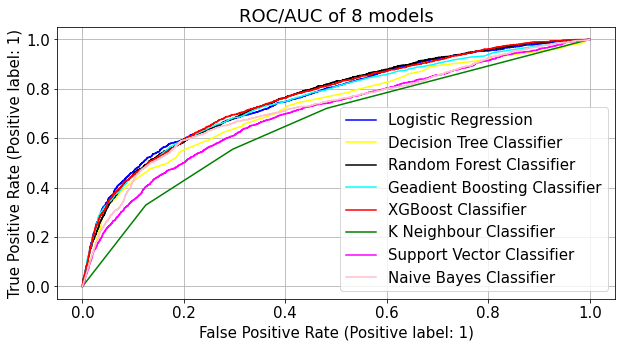

In [ ]:
#  Plot ROC_AUC curve of 8 models

fig,ax=plt.subplots(figsize=(10,5))

plot_roc_curve(lr, X_test, y_test,ax=ax, color="blue",label='Logistic Regression')
plot_roc_curve(dtc, X_test, y_test,ax=ax, color="yellow",label='Decision Tree Classifier')
plot_roc_curve(rfc, X_test, y_test,ax=ax, color="black",label='Random Forest Classifier')
plot_roc_curve(gbc, X_test, y_test,ax=ax, color="cyan",label='Geadient Boosting Classifier')
plot_roc_curve(xgb, X_test.to_numpy(), y_test,ax=ax, color="red",label='XGBoost Classifier')
plot_roc_curve(knnc, X_test, y_test,ax=ax, color="green",label='K Neighbour Classifier')
plot_roc_curve(svc, X_test, y_test,ax=ax, color="magenta",label='Support Vector Classifier')
plot_roc_curve(nbc, X_test, y_test,ax=ax, color="pink",label='Naive Bayes Classifier')

plt.title('ROC/AUC of 8 models')
plt.grid()



*   This plot shows ROC-AUC curve for whole 8 model. 

*   XGBoost classifier algorithm shows best performance compare to other.





# Confusion Matrix

* A confusion matrix is a table that is used to define the performance of a classification algorithm. A confusion matrix visualizes and summarizes the performance of a classification algorithm.



Text(0.5, 1.0, 'Naive Bayes Classifier')

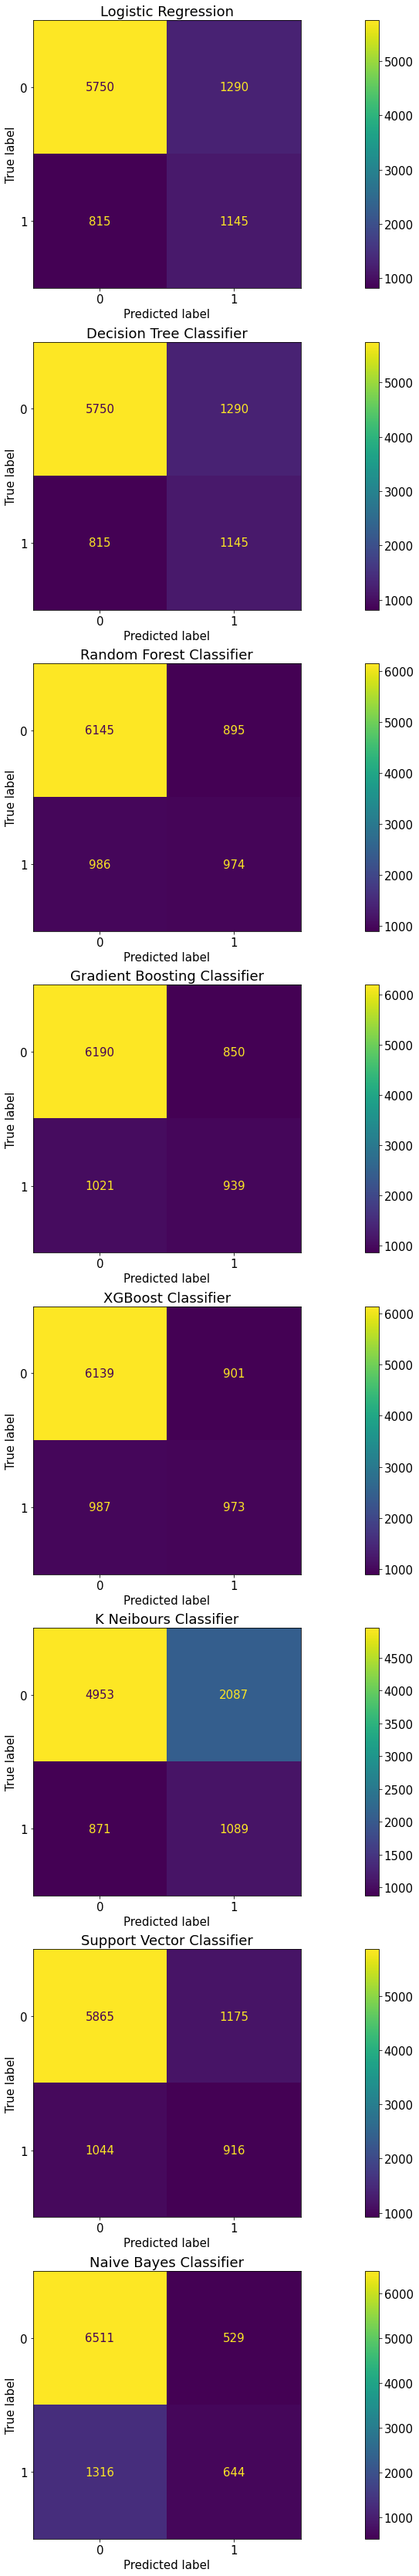

In [ ]:
# Plot confusion matrix of 8 models

fig,ax=plt.subplots(8,1, figsize=(30,60))

plot_confusion_matrix(lr, X_test, y_test, ax = ax[0], values_format="d")
ax[0].set_title("Logistic Regression")

plot_confusion_matrix(lr, X_test, y_test, ax = ax[1], values_format="d")
ax[1].set_title("Decision Tree Classifier")

plot_confusion_matrix(rfc, X_test, y_test, ax = ax[2], values_format="d")
ax[2].set_title("Random Forest Classifier")

plot_confusion_matrix(gbc, X_test, y_test, ax = ax[3], values_format="d")
ax[3].set_title("Gradient Boosting Classifier")

plot_confusion_matrix(xgb, X_test.to_numpy(), y_test, ax = ax[4], values_format="d")
ax[4].set_title("XGBoost Classifier")

plot_confusion_matrix(knnc, X_test, y_test, ax = ax[5], values_format="d")
ax[5].set_title("K Neibours Classifier")

plot_confusion_matrix(svc, X_test, y_test, ax = ax[6], values_format="d")
ax[6].set_title("Support Vector Classifier")

plot_confusion_matrix(nbc, X_test, y_test, ax = ax[7], values_format="d")
ax[7].set_title("Naive Bayes Classifier")



*  Whole plot shows confusion matrix for different algorithms.

# Feature Importance

,Feature,Feature importance
19,PAY_1_2,0.091948
41,PAY_3_2,0.080596
6,MARRIAGE_1,0.052715
4,EDUCATION_2,0.049846
30,PAY_2_2,0.047545
10,AGE_1,0.045605
0,GENDER_1,0.041663
11,AGE_2,0.040918
9,AGE_0,0.039743
105,PAY_6_2,0.036919


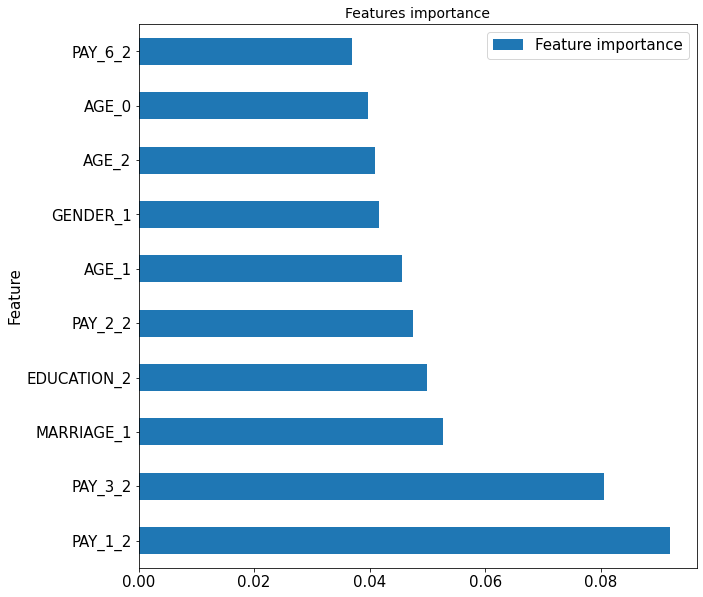

In [ ]:
# Plot feature importance  - XG Boost Model 

fea_df = pd.DataFrame({'Feature': X.columns, 'Feature importance': xgb.feature_importances_}).sort_values(by='Feature importance',ascending=False)
fea_df=fea_df.iloc[:10]

figure, ax = plt.subplots(figsize = (10,10))
fea_df.plot.barh(x='Feature',y='Feature importance', ax=ax)
plt.title('Features importance',fontsize=14)
fea_df



*  This graph shows the feature importance of XgBoost model.
*  In this model most important feature is "PAY_1".



,Feature,Feature importance
19,PAY_1_2,0.443967
30,PAY_2_2,0.249395
41,PAY_3_2,0.109193
119,PAY_AMT1,0.066243
112,LIMIT_BAL,0.038986
121,PAY_AMT3,0.023344
122,PAY_AMT4,0.017563
120,PAY_AMT2,0.012224
18,PAY_1_1,0.010469
103,PAY_6_-1,0.006535


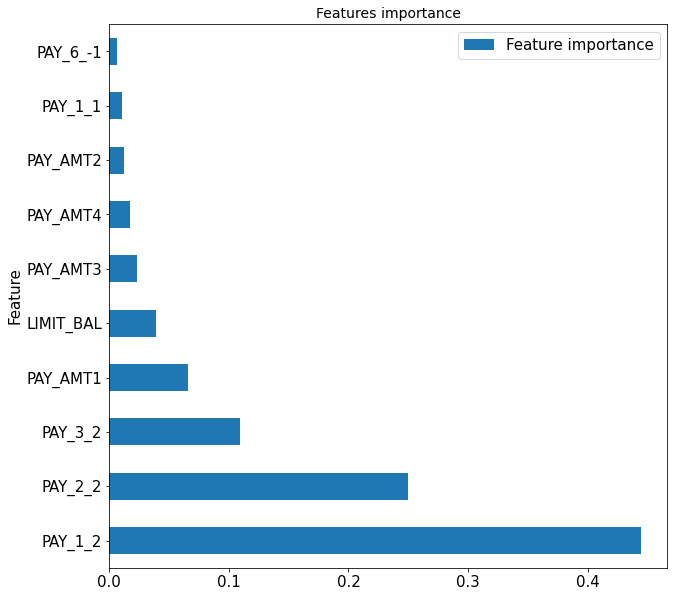

In [ ]:
# Plot feature importance  - Gradient Boosting Classifier Model 

fea_df = pd.DataFrame({'Feature': X.columns, 'Feature importance': gbc.feature_importances_}).sort_values(by='Feature importance',ascending=False)
fea_df=fea_df.iloc[:10]

figure, ax = plt.subplots(figsize = (10,10))
fea_df.plot.barh(x='Feature',y='Feature importance', ax=ax)
plt.title('Features importance',fontsize=14)
fea_df



*   This graph shows the feature importance of Gradient Boosting  model.
*   In this model most important feature is "PAY_1".



,Feature,Feature importance
19,PAY_1_2,0.068446
112,LIMIT_BAL,0.063960
119,PAY_AMT1,0.044667
30,PAY_2_2,0.043170
120,PAY_AMT2,0.041631
17,PAY_1_0,0.041451
113,BILL_AMT1,0.039866
124,PAY_AMT6,0.039056
114,BILL_AMT2,0.037823
121,PAY_AMT3,0.036477


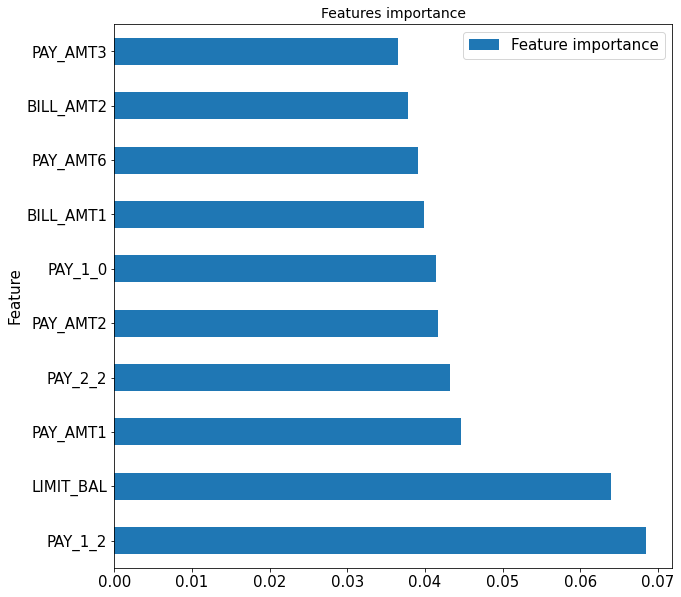

In [ ]:
# Plot feature importance  - Random Forest Classifier Model

rf_optimal_model = rfc.best_estimator_
rf_optimal_model 

fea_df = pd.DataFrame({'Feature': X.columns, 'Feature importance': rf_optimal_model.feature_importances_}).sort_values(by='Feature importance',ascending=False)
fea_df=fea_df.iloc[:10]

figure, ax = plt.subplots(figsize = (10,10))
fea_df.plot.barh(x='Feature',y='Feature importance', ax=ax)
plt.title('Features importance',fontsize=14)
fea_df

*  This graph shows the feature importance of Random Forest Classifier model.
*  In this model most important features are  "PAY_1" and "LIMIT_BAL".

# Model Recommendation & Conclusion



*   After observing Precision, Recall, ROC-AUC curve and Accuracy score  i would recommend XGBoost and Random Forest Classifier Model.

*   The balance of recall and precision is the most important metric, then XGBoost and Random Forest Classifier Model are the ideal model.

*  The strongest predictors of default are the PAY_X (i.e. the repayment status in previous months), the LIMIT_BAL & the PAY_AMTX (amount paid in previous months).


*   We see that being Female, More educated, Single and between 30-40years old means a customer is more likely to make payments on time.


*   Best accuracy score:

     1) Random Forest Classifier: (a) Test Data=  94% (b) Train Data= 80%

     2) XGBoost Classifier : (a) Test Data= 81%  (b) Train Data= 80%








